In [18]:
import numpy as np
import matplotlib.pyplot as plt


In [19]:
# CONSTANTS
STEP_SIZES = [0.1, 0.05, 0.01, 0.005, 0.001]  # List of step sizes for different approximations

T0 = 0      # Initial time t0 = 0
Y0 = 1      # Initial value y0 = 1
T_END = 5   # End time t_end = 5


In [20]:
def f(t, y):
    """
    Function representing the right-hand side of the differential equation dy/dt = -2y + 2 - e^(-4t)
    
    Parameters:
    t (float): The current time value.
    y (float): The current value of the function y(t).
    
    Returns:
    float: The rate of change of y at time t.
    """
    return -2 * y + 2 - np.exp(-4 * t)


In [21]:
def exact_solution(t):
    """
    Exact solution to the differential equation derived.
    
    Parameters:
    t (float or array-like): The time points at which to evaluate the exact solution.
    
    Returns:
    float or array-like: The exact value of y(t) at the given time points.
    """
    return 1 + 0.5 * (np.exp(-4 * t) - np.exp(-2 * t))


In [22]:
def euler_method(f, t0, y0, h, t_end):
    """
    Implements Euler's method to approximate the solution of an ODE.
    
    Parameters:
    f (function): The function representing dy/dt.
    t0 (float): Initial time value.
    y0 (float): Initial value of y at t0.
    h (float): Step size for Euler's method.
    t_end (float): The final time value for the approximation.
    
    Returns:
    tuple: Arrays of time points and corresponding approximate y values.
    """
    # Generate an array of time points from t0 to t_end with step size h
    t_values = np.arange(t0, t_end + h, h)
    # Initialize an array to store the approximate y values
    y_values = np.zeros(len(t_values))
    # Set the initial condition for y
    y_values[0] = y0
    
    # Apply Euler's method iteratively
    for i in range(1, len(t_values)):
        # Update y based on Euler's formula
        y_values[i] = y_values[i - 1] + h * f(t_values[i - 1], y_values[i - 1])
    
    # Return both the time points and corresponding y values
    return t_values, y_values


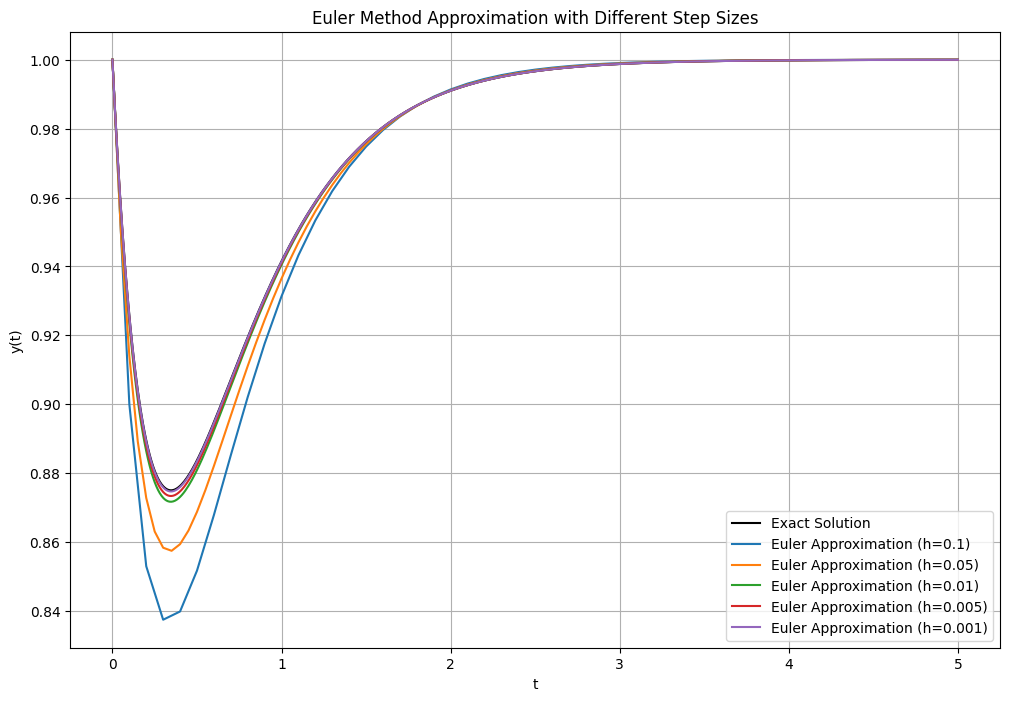

In [23]:
def main():
    plt.figure(figsize=(12, 8))  # Prepare the plot for multiple step sizes

    # Compute exact solution for comparison
    t_exact = np.linspace(T0, T_END, 1000)  # Fine grid of time points for smooth exact solution
    y_exact = exact_solution(t_exact)  # Compute the exact y values
    plt.plot(t_exact, y_exact, 'k', label='Exact Solution')  # Plot the exact solution (black line)

    # Loop over different step sizes to compute and plot Euler's method results
    for h in STEP_SIZES:
        t_euler, y_euler = euler_method(f, T0, Y0, h, T_END)  # Euler approximation for each step size
        plt.plot(t_euler, y_euler, label=f'Euler Approximation (h={h})')  # Plot the approximation

    # Add details to the plot
    plt.title('Euler Method Approximation with Different Step Sizes')  # Plot title
    plt.xlabel('t')  # Label for the x-axis (time)
    plt.ylabel('y(t)')  # Label for the y-axis (y value)
    plt.legend()  # Show legend to indicate different step sizes
    plt.grid(True)  # Add grid lines for better visualization
    plt.show()  # Display the plot

if __name__ == "__main__":
    main()
